In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## Functions

The advantage of using a computer to do computations is that you can easily create a method to do something repeatedly.  The simplest method to do this in python is with a function.

A basic definition of a function: a set of actions that we group together.  

Python has many functions already built in (e.g., the np.sine etc that you used in the plotting unit), but here we are talking about functions that we need to write ourselves.

The basic things to remember with functions is:

- Defining the function 
  - first write the keyword def which signals that a function follows.
  - give the function a name.  No spaces in the function name.
  - parentheses enclose the arguments, i.e., inputs.
  - end the first line with a colon.
  - subsequent lines are indented.
 
- Using the function
  - to call the function, write its name followed by parenthesis enclosing the variables that you have defined.
  

  
So the basic schematic of a function is:


```
# defining a function.

def function_name(argument_1,argument_2):
       # Do what we want to 
       # argument_1 and argument_2.
       # This can include for loops, if statements, etc.
       
# calling (executing) the function

function_name(value_1, value_2)
```
  
Let's write a basic function.

In [2]:
def happy_birthday(name):
    print('Happy Birthday, '+name+'!')

In [3]:
name='Brigitta'
happy_birthday(name)

Happy Birthday, Brigitta!


You can see the advantage of this little program - every time one of your friends has a birthday, you can just define the name and execute the code.  

### Try this.

Below find a cell which contains the days of the week.  Write a function that will take an input day, and then will print 'Ugh, I have to go to work.' if the day is among the weekdays, or will print 'Yay, its the weekend!' if it is saturday or sunday.

In [4]:
days_of_the_week=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

In [5]:
def which_day(day):
    if day in days_of_the_week[:5]:
        print ('Ugh, I have to go to work')
    else:
        print ('Yay, its the weekend!')


In [6]:
day='Monday'
which_day(day)

day='Saturday'
which_day(day)

Ugh, I have to go to work
Yay, its the weekend!


## Advantages of Functions

The advantages of functions are clear:
 - We write a set of instructions once.
 - Once the function is debugged, then you don't have to worry about that task any more.  
 - You can modify a function's behavior, and that change takes effect each time the function is called.  
 
The opposite to writing functions is sometimes called _hard coding_.  That is, each time you want to do a specific task to a new variable or parameter, you copy and paste that from one place in the program to the other.  The disadvantage comes when you either find an error or need to modify what you have done.  You would have to hunt through potentially many lines of code to locate all the instances of that particular issue.

## Returning a value or values

Often in data analysis and computation, you not only want to do something to some parameters, but return a value or values to the program to be used for something else.  This requires just a small modification of the above.

```
def another_function(argument_1,argument_2):
       # Do what we want to 
       # argument_1 and argument_2.
       # for example:
       # y=argument_1+argument_2
       return y
       
# calling (executing) the function

y=function_name(value_1, value_2)
```


In [7]:
def adder(x1,x2):
    y=x1+x2
    return y

x1=5
x2=7

y=adder(x1,x2)
print (y)

12


### Important to keep in mind for return statements:

The function will quit once the return has been executed.

In [8]:
def adder_multiplier(x1,x2):
    y=x1+x2
    if y >= 0:
        return y
    z=x1*x2
    if z >= 0:
        return z    

x1=5
x2=7

y=adder_multiplier(x1,x2)
print (y)

12


### The way to work around this problem

is to not return anything until you have done everything you have set out to do.  For example, we can fix the above as follows.  

This example also shows that you can return multiple things from a single function call.

In [9]:
def adder_multiplier_new(x1,x2):
    result1=x1+x2
    result2=x1*x2
    null_value=0
    if (result1 >= 0.0) & (result2 >=0.0):
        return result1,result2
    if (result1 >=0) & (result2 < 0):
        return result1,null_value
    if (result2 >=0) & (result1 < 0):
        return null_value,result2
    if (result1 < 0) & (result1 < 0):
        return null_value,null_value


x1=5.0
x2=7.0

result1,result2=adder_multiplier_new(x1,x2)
print (result1,result2)

x3=5.0
x4=-7.0

result3,result4=adder_multiplier_new(x3,x4)
print (result3,result4)



12.0 35.0
0 0


## Position in the argument string is important

In python, the position of an argument is critical.  For example, consider the following example.

In [10]:
def born_on(month,day):
    str_out='I was born on '+month+' '+str(day)+'.'
    print (str_out)
    
month='April'
day=30

print (type(month))
print (type(day))

<class 'str'>
<class 'int'>


In [11]:
born_on(month,day)

I was born on April 30.


In [12]:
born_on(day,month)

TypeError: can only concatenate str (not "int") to str

### A way to get around this limitation is through the use of keyword arguments.  

That is, you can specify the arguments in any order if you equate them to the _keyword_, which is the name of the argument in the definition statement.  See the following example.

In [13]:
born_on(day=day,month=month)
born_on(month=month,day=day)
born_on(day=7,month='June')

I was born on April 30.
I was born on April 30.
I was born on June 7.


## Making functions more flexible.

There are ways to make your functions more flexible.  This can result in making your code more compact.  

However, note:
 - It is better to get your code working _before_ you try to optimize it.
 
Remember, as scientists, generally we care about the physical results, and not the aesthetics of the code.  The first goal is to get some code that works and be certain that it is working correctly, and that is often sufficient.  

(There are exceptions to this statement.  If your code takes a long time to run, it may be worth working to try to make it more efficient.  But the first goal is to get something that runs.)

So the following tweaks may be not be necessary.

### Default arguments

Say you have a piece of code that you want to execute on some data, and say that, for some reason, nine times out of ten, one of the input values will always be, for example, equal to 2.  It is probably more efficient if you write your function so that it takes the value 2 as a default.

In [14]:
def doing_something(x1,x2=2):
    print (x1,x2)
    
x1=7

doing_something(x1,x2)

x1=7
x2=5

doing_something(x1,x2)

7 7.0
7 5


## Mixing positional and keyword arguments

Sometimes you need a function which will always require a certain number of arguments, but then has some flexibility to include others if they are present.  

For these, you can specify positional arguments for the necessary ones, and keyword arguments set equal to "None" for the optional ones.  

**Note:**  If you mix positional and keyword arguments, the positional need to come first.

In [15]:
def born_on(month,date,day_of_the_week=None):
    str_out='I was born on '+month+' '+str(date)+'.'
    print (str_out)
    if day_of_the_week:
        print ('That was a '+day_of_the_week+'.')
    
month='April'
date=30
day_of_the_week='Thursday'

born_on(month,date,day_of_the_week)

I was born on April 30.
That was a Thursday.


In [16]:
born_on(month,date)

I was born on April 30.


---

# Blackbody spectrum (aka the Planck function)

The blackbody spectrum is specified as:

$$B_\lambda(T)=\frac{2hc^2/\lambda^5}{exp(hc/\lambda k T)-1}$$

where $h$ is the Planck constant, $c$ is the speed of light, $\lambda$ is the wavelength, $h$ is the Boltzmann constant, and $T$ is the temperature.

Our goal is to write a function to compute the function for input wavelength vector and temperature.


## Scientific constants

Normally, you need to look up the specified constants and either define them as variables (better) or type them in your equation (more prone to mistakes).  Fortunately, python already has packages with these constants available. We will use "astropy" https://docs.astropy.org/en/stable/ .

In [17]:
from astropy import constants as const

In [18]:
print (const.h)

  Name   = Planck constant
  Value  = 6.62607004e-34
  Uncertainty  = 8.1e-42
  Unit  = J s
  Reference = CODATA 2014


In [19]:
print (const.h.cgs)

6.62607004e-27 erg s


In [20]:
print (const.k_B)

  Name   = Boltzmann constant
  Value  = 1.38064852e-23
  Uncertainty  = 7.9e-30
  Unit  = J / K
  Reference = CODATA 2014


In [21]:
print (const.k_B.cgs)

1.38064852e-16 erg / K


In [22]:
print (const.c)

  Name   = Speed of light in vacuum
  Value  = 299792458.0
  Uncertainty  = 0.0
  Unit  = m / s
  Reference = CODATA 2014


In [23]:
print (const.c.cgs)

29979245800.0 cm / s


## Wavelength Range

Next we will need to make some decisions about our independent variable wavelength.  Most of the time we will be working in the optical band, so we will use Angstroms ($\overset{\circ}{A}$), although people working in different bands use different units.  In addition, Europeans sometimes use nanometers for the optical band.

But we will also consider emission beyond the optical.  The bandpasses are defined roughly as:

The astronomical bands are given by (approximately):

- Gamma Rays $(\lambda < 0.1 \overset{\circ}{A})$
- X-rays $(1 \overset{\circ}{A} < \lambda < 10 \overset{\circ}{A})$
- UV $( \overset{\circ}{A} < \lambda < 10,000 \overset{\circ}{A})$
- Visible $( \sim 3150 \overset{\circ}{A} < \lambda < \sim 10,000 \overset{\circ}{A})$
- Near Infrared $( \sim 9500 \overset{\circ}{A} < \lambda < \sim 50,000 \overset{\circ}{A})$
- Mid Infrared $( 7.5 \mu m  < \lambda < 25 \mu m)$
- Far Infrared 
- Submillimeter
- Radio

The eye has significant sensitivity between 4000 (violet) and 7600 (red) Angstroms.

----

For this exercise, let's consider the band between 10 Angstroms and 10000 Angstroms, and let's create a wavelength vector to do that.

In [24]:

np.logspace?

In [40]:
wave=np.logspace(2,4,1000,endpoint=True)
print (type(wave))

<class 'numpy.ndarray'>


In [41]:
print (wave[0])
print (wave[-1])
print (wave.shape)

100.0
10000.0
(1000,)


## Temperature Range

What temperatures should we consider?  We're going to be looking at stellar spectra, where the range of temperatures is about 42,000K for an O5 star down to 2860K for a M7 star.  Cooler spectral types have been found, but they are difficult to find and observe.

## Anything else we need?

In [42]:
print (np.exp(1.0))

2.718281828459045


## What about the units?  

Better do some dimensional analysis first:

$$B_\lambda(T)=\frac{2hc^2/\lambda^5}{exp(hc/\lambda k T)-1}$$



Write a function that, given the input wavelength and the temperature of the blackbody, will return the flux density.

In [57]:
def compute_planck(wave,T):
    wave_cm=1.0e-8*wave
    temp1=2.0*const.h.cgs*const.c.cgs/(wave_cm**5)
    temp2=const.h.cgs*const.c.cgs/(wave_cm*const.k_B.cgs*T)
    bb=temp1.value/(np.exp(temp2.value)-1.0)
    return bb

In [75]:
T=50000.0
bb=compute_planck(wave,T)

426926816.0444831


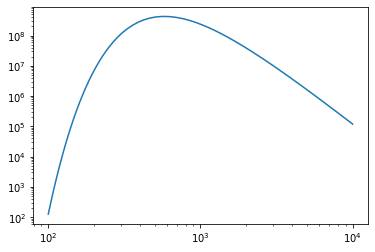

In [76]:
print (bb.max())
plt.loglog(wave,bb)


#### Notice how, once we define the function, we can use it in any cell henceforth.

## Try this

### Part 1:

Write a function that will compute a blackbody spectrum for any input temperature, but will take, instead of the wavelength vector, starting and stopping wavelength points, and number of points in the wavelength vector.  If the number of points is not specified, it will assume that there will be 1000 points.  Have it return both the planck spectrum and the wavelength vector.

Also, because we will be trying to match stellar spectra with a range of brightnesses, you will need to include a normalization factor to make the blackbody spectrum stronger or weaker in intensity.  But let this argument be optional.

In [127]:
def compute_planck_general(T,start_wave,stop_wave,norm=1,numwave=1000):
    wave_new=np.logspace(np.log10(start_wave),np.log10(stop_wave), \
            1000,endpoint=True)
    wave_cm=1.0e-8*wave_new
    temp1=2.0*const.h.cgs*const.c.cgs/(wave_cm**5)
    temp2=const.h.cgs*const.c.cgs/(wave_cm*const.k_B.cgs*T)
    bb=norm*temp1.value/(np.exp(temp2.value)-1.0)
    return wave_new,bb

[4000.         4002.24133157 4004.48391903 4006.72776308 4008.97286443
 4011.21922379 4013.46684186 4015.71571934 4017.96585694 4020.21725537]


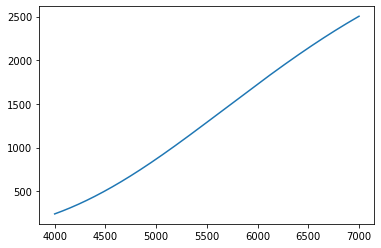

In [129]:
start_wave=4000.0
stop_wave=7000.0
T=3000.0
wave_new,bb_new=compute_planck_general(T,start_wave,stop_wave,norm=10.0)
print (wave_new[0:10])
plt.plot(wave_new,bb_new)

### Part 2:

Devise a series of sanity checks that show that your function works the way you expect.  

- First explain your sanity checks - what do you need to check to be sure your function is working correctly?  Write this in a markdown cell.
- Then do the sanity checks and comment on the results.

In [160]:
# Haven't done this yet.

## Bonus exercise

Write a program that will create a plot showing the blackbody function for ten temperatures, base-10 logarithmically spaced, between 27,000K to 2700K.  

For this, use the coolwarm color map, and be sure that the hotter blackbodies are blue and the cooler ones are red.

In [149]:
# set up temperatures
temperatures=np.logspace(np.log10(2700.0),np.log10(27000.0),10,endpoint=True)
print (temperatures)

[ 2700.          3487.18409554  4503.87145044  5816.97366309
  7512.91038596  9703.29689227 12532.28985075 16186.07475861
 20905.11943239 27000.        ]


In [150]:
# set up color map with 10 colors

from matplotlib import cm

start=0.0
stop=1.0
number_of_lines=10
cm_subsection = np.linspace(start, stop, number_of_lines)
colors = [ cm.coolwarm(x) for x in cm_subsection ]



In [158]:
def make_temperature_plot(wave,temperatures):
    for i in range(10):
        bb=compute_planck(wave,temperatures[i])
        plt.loglog(wave,bb,color=colors[9-i],linewidth=2.5,
                   label=str(int(temperatures[i])))

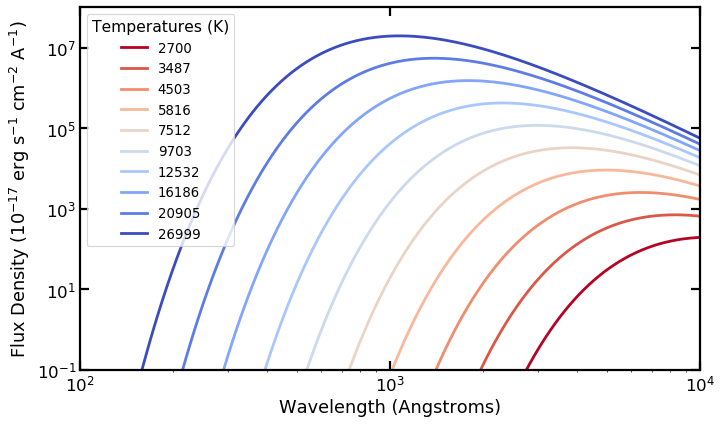

In [159]:
fig, ax = plt.subplots(figsize=(10,6), dpi=80)
make_temperature_plot(wave,temperatures)
ax.set_xlabel('Wavelength (Angstroms)',fontsize=16)
ax.set_ylabel('Flux Density ($10^{-17}$ erg s$^{-1}$ cm$^{-2}$ A$^{-1}$)',fontsize=16)

plt.xlim(wave.min(), wave.max())
plt.ylim(0.1, 100000000.0)

plt.legend(loc='upper left', frameon=True,fontsize=12, \
           title='Temperatures (K)',title_fontsize=14)

# make the axes thicker

ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

ax.tick_params(top=True,right=True,direction='in',length=8, width=2)
